# Linear Regression Single Variable

In [4]:
import pandas as pd 

In [5]:
import numpy as np

In [7]:
import matplotlib.pyplot as plt

In [8]:
from sklearn import linear_model

In [9]:
home_price = {
    'area': [2600, 3000, 3200, 3600, 4000],
    'price': [550000, 565000, 610000, 680000, 725000]
}

In [10]:
type(home_price)

dict

In [11]:
df = pd.DataFrame.from_dict(home_price)

In [12]:
df

area   price
0  2600  550000
1  3000  565000
2  3200  610000
3  3600  680000
4  4000  725000

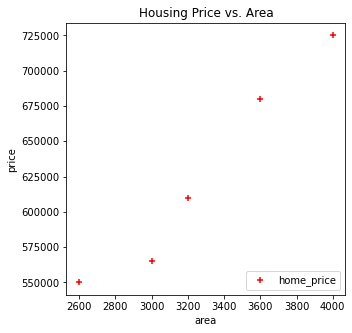

In [13]:
%matplotlib inline

plt.figure(figsize=(5, 5))
plt.scatter(df['area'],
            df['price'],
            label='home_price',
            color='red',
            marker='+')
plt.xlabel('area')
plt.ylabel('price')

plt.title('Housing Price vs. Area')
plt.legend(loc=4)
plt.show()

In [15]:
model = linear_model.LinearRegression()
model.fit(df[['area']],df['price'] )

LinearRegression()

In [16]:
model.predict([[3300]])

array([628715.75342466])

In [17]:
m = model.coef_

In [18]:
b = model.intercept_

In [70]:
y = m * 3300 + b

print (y)

[628715.75342466]


In [19]:
area = np.array([
    1000, 1500, 2300, 3540, 4120, 4560, 5490, 3460, 4750, 2300, 9000, 8600,
    7100
]).reshape(-1, 1)

In [20]:
area.shape

(13, 1)

In [21]:
p = model.predict(area)

In [74]:
df_predict_index = np.arange(0,13).tolist()
print(df_predict_index)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [75]:
df_predict = pd.DataFrame(data=area, index= df_predict_index, columns=['area'] )

In [76]:
df_predict.head(3)

area
0  1000
1  1500
2  2300

In [79]:
df_predict['predicted_price'] = p
df_predict

area  predicted_price
0   1000     3.164041e+05
1   1500     3.842979e+05
2   2300     4.929281e+05
3   3540     6.613048e+05
4   4120     7.400616e+05
5   4560     7.998082e+05
6   5490     9.260908e+05
7   3460     6.504418e+05
8   4750     8.256079e+05
9   2300     4.929281e+05
10  9000     1.402705e+06
11  8600     1.348390e+06
12  7100     1.144709e+06

In [80]:
# Savig prediction results to csv 
df_predict.to_csv('prediction.csv', index = False)

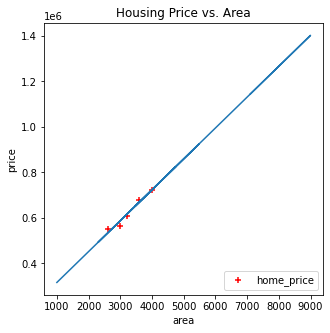

In [82]:
%matplotlib inline

plt.figure(figsize=(5,5))
plt.scatter(df['area'], df['price'], label='home_price', color='red',marker='+')
plt.plot (df_predict['area'], df_predict['predicted_price'])
plt.xlabel('area')
plt.ylabel('price')

plt.title('Housing Price vs. Area')
plt.legend(loc=4)
plt.show()

## Exercise 

Predict canada's per capita income in year 2020. There is an exercise folder here on github at same level as this notebook, download that and you will find canada_per_capita_income.csv file. Using this build a regression model and predict the per capita income fo canadian citizens in year 2020

In [83]:
income_df = pd.read_csv('D:/GitHub/py/ML/1_linear_reg/Exercise/canada_per_capita_income.csv')

In [84]:
income_df.head()

year  per capita income (US$)
0  1970              3399.299037
1  1971              3768.297935
2  1972              4251.175484
3  1973              4804.463248
4  1974              5576.514583

In [85]:
income_df.columns

Index(['year', 'per capita income (US$)'], dtype='object')

In [96]:
income_df=income_df.rename(columns={'per capita income (US$)': 'income'})

In [97]:
income_df.describe()

year        income
count    47.000000     47.000000
mean   1993.000000  18920.137063
std      13.711309  12034.679438
min    1970.000000   3399.299037
25%    1981.500000   9526.914515
50%    1993.000000  16426.725480
75%    2004.500000  27458.601420
max    2016.000000  42676.468370

In [98]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    47 non-null     int64  
 1   income  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 880.0 bytes


In [99]:
income_df.shape

(47, 2)

In [100]:
reg = linear_model.LinearRegression()
reg.fit(income_df[['year']], income_df[['income']])

LinearRegression()

In [101]:
reg.coef_

array([[828.46507522]])

In [102]:
reg.intercept_

array([-1632210.75785546])

In [108]:
print('Canada\'s per capita income in year 2020: {}'.format(reg.predict([[2020]])))

Canada's per capita income in year 2020: [[41288.69409442]]


# Linear Regression with Multiple Variables

In [8]:
df = pd.read_csv('D:/GitHub/py/ML/2_linear_reg_multivariate/homeprices.csv')
df.head()

area  bedrooms  age   price
0  2600       3.0   20  550000
1  3000       4.0   15  565000
2  3200       NaN   18  610000
3  3600       3.0   30  595000
4  4000       5.0    8  760000

In [11]:
import math 
median_bedrooms = math.floor(df.bedrooms.median())
median_bedrooms

4

In [17]:
df.bedrooms = df.bedrooms.fillna(median_bedrooms)
df

area  bedrooms  age   price
0  2600       3.0   20  550000
1  3000       4.0   15  565000
2  3200       4.0   18  610000
3  3600       3.0   30  595000
4  4000       5.0    8  760000
5  4100       6.0    8  810000

In [19]:
reg = linear_model.LinearRegression()
reg.fit(df[['area', 'bedrooms', 'age']], df.price)

LinearRegression()

In [20]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [21]:
reg.intercept_

221323.00186540408

In [22]:
reg.predict([[3000, 3, 40]])

array([498408.25158031])

## Exercise

In exercise folder (same level as this notebook on github) there is hiring.csv. This file contains hiring statics for a firm such as experience of candidate, his written test score and personal interview score. Based on these 3 factors, HR will decide the salary. Given this data, you need to build a machine learning model for HR department that can help them decide salaries for future candidates. Using this predict salaries for following candidates:

2 yr experience, 9 test score, 6 interview score

12 yr experience, 10 test score, 10 interview score

In [63]:
df = pd.read_csv('D:/GitHub/py/ML/2_linear_reg_multivariate/Exercise/hiring.csv')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   experience                  6 non-null      object 
 1   test_score(out of 10)       7 non-null      float64
 2   interview_score(out of 10)  8 non-null      int64  
 3   salary($)                   8 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 384.0+ bytes


In [65]:
df.describe()

test_score(out of 10)  interview_score(out of 10)    salary($)
count               7.000000                    8.000000      8.00000
mean                7.857143                    7.875000  63000.00000
std                 1.345185                    1.642081  11501.55269
min                 6.000000                    6.000000  45000.00000
25%                 7.000000                    6.750000  57500.00000
50%                 8.000000                    7.500000  63500.00000
75%                 8.500000                    9.250000  70500.00000
max                10.000000                   10.000000  80000.00000

In [66]:
df.shape

(8, 4)

In [67]:
df.columns

Index(['experience', 'test_score(out of 10)', 'interview_score(out of 10)',
       'salary($)'],
      dtype='object')

In [68]:
df.index

RangeIndex(start=0, stop=8, step=1)

In [69]:
df.isna().sum()

experience                    2
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [70]:
df.isnull().sum()

experience                    2
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [72]:
df.experience = df.experience.fillna('zero')
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(df['test_score(out of 10)'].median())
df

experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0       zero                    8.0                           9      50000
1       zero                    8.0                           6      45000
2       five                    6.0                           7      60000
3        two                   10.0                          10      65000
4      seven                    9.0                           6      70000
5      three                    7.0                          10      62000
6        ten                    8.0                           7      72000
7     eleven                    7.0                           8      80000

### Note: how to convert number-words to numbers 

In [43]:
! pip install word2number

  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5586 sha256=93965089130fcd2b473ac323a217f5587e248309f9cf956caafb7db8387d5113
  Stored in directory: c:\users\hnour\appdata\local\pip\cache\wheels\4b\c3\77\a5f48aeb0d3efb7cd5ad61cbd3da30bbf9ffc9662b07c9f879
Successfully built word2number


In [53]:
# Example
from word2number import w2n 

In [47]:
# initializing string
test_str = "zero four zero one"

In [48]:
# printing original string
print("The original string is : " + test_str)

The original string is : zero four zero one


In [52]:
# Convert numeric words to numbers
# Using word2number
res = w2n.word_to_num(test_str)

type(res)

int

In [50]:
# printing result 
print("The string after performing replace : " + str(res))

The string after performing replace : 1


In [55]:
type(df.experience[2])

str

In [73]:
df.dtypes

experience                     object
test_score(out of 10)         float64
interview_score(out of 10)      int64
salary($)                       int64
dtype: object

In [77]:
df.experience = df.experience.apply(w2n.word_to_num)

In [78]:
df

experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0           0                    8.0                           9      50000
1           0                    8.0                           6      45000
2           5                    6.0                           7      60000
3           2                   10.0                          10      65000
4           7                    9.0                           6      70000
5           3                    7.0                          10      62000
6          10                    8.0                           7      72000
7          11                    7.0                           8      80000

In [79]:
reg = linear_model.LinearRegression()
reg.fit(df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']], df['salary($)'])

LinearRegression()

In [80]:
reg.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [81]:
reg.intercept_

17737.26346433771

In [82]:
reg.predict ([[2,9,6]])

array([53205.96797671])

In [83]:
reg.predict([[12,10,10]])

array([92002.18340611])

### Save Model To a File Using Python Pickle

In [1]:
import pickle

In [22]:
with open('model_pickle','wb') as file:
    pickle.dump(model,file)

### Load Saved Model

In [23]:
with open('model_pickle','rb') as file:
    mp = pickle.load(file)

In [24]:
mp.coef_

array([135.78767123])

In [25]:
mp.intercept_

180616.43835616432

In [28]:
mp.predict([[5000]])

array([859554.79452055])

#### Save Trained Model Using joblib

We can save the model using sklearn model persistence. If the model has large numpy arrays the joblib is more efficient. 

In [30]:
from sklearn.externals import joblib

joblib.dump(model, 'model_joblib')

['model_joblib']

#### Load Saved Model

In [31]:
mj = joblib.load('model_joblib')

In [32]:
mj.coef_

array([135.78767123])

In [33]:
mj.intercept_

180616.43835616432

In [34]:
mj.predict([[5000]])

array([859554.79452055])

# Categorical Variables and One Hot Encoding

In [82]:
import pandas as pd

In [83]:
df = pd.read_csv("D:/GitHub/py/ML/5_one_hot_encoding/homeprices.csv")
df

town  area   price
0   monroe township  2600  550000
1   monroe township  3000  565000
2   monroe township  3200  610000
3   monroe township  3600  680000
4   monroe township  4000  725000
5      west windsor  2600  585000
6      west windsor  2800  615000
7      west windsor  3300  650000
8      west windsor  3600  710000
9       robinsville  2600  575000
10      robinsville  2900  600000
11      robinsville  3100  620000
12      robinsville  3600  695000

<h2 style='color:purple'>Using pandas to create dummy variables</h2>

In [38]:
dummies = pd.get_dummies(df.town)
dummies

monroe township  robinsville  west windsor
0                 1            0             0
1                 1            0             0
2                 1            0             0
3                 1            0             0
4                 1            0             0
5                 0            0             1
6                 0            0             1
7                 0            0             1
8                 0            0             1
9                 0            1             0
10                0            1             0
11                0            1             0
12                0            1             0

As a alternative we can use the following code:

''' df = pd.concat([df, pd.get_dummies(df['town'])], axis=1) '''

In [39]:
merged = pd.concat([df,dummies],axis='columns')
merged

town  area   price  monroe township  robinsville  west windsor
0   monroe township  2600  550000                1            0             0
1   monroe township  3000  565000                1            0             0
2   monroe township  3200  610000                1            0             0
3   monroe township  3600  680000                1            0             0
4   monroe township  4000  725000                1            0             0
5      west windsor  2600  585000                0            0             1
6      west windsor  2800  615000                0            0             1
7      west windsor  3300  650000                0            0             1
8      west windsor  3600  710000                0            0             1
9       robinsville  2600  575000                0            1             0
10      robinsville  2900  600000                0            1             0
11      robinsville  3100  620000                0            1             0
12      robinsville  3600  695000                0            1             0

In [40]:
final = merged.drop(['town'], axis='columns')
final

area   price  monroe township  robinsville  west windsor
0   2600  550000                1            0             0
1   3000  565000                1            0             0
2   3200  610000                1            0             0
3   3600  680000                1            0             0
4   4000  725000                1            0             0
5   2600  585000                0            0             1
6   2800  615000                0            0             1
7   3300  650000                0            0             1
8   3600  710000                0            0             1
9   2600  575000                0            1             0
10  2900  600000                0            1             0
11  3100  620000                0            1             0
12  3600  695000                0            1             0

<h3 style='color:purple'>Dummy Variable Trap</h3>

When you can derive one variable from other variables, they are known to be multi-colinear. Here
if you know values of california and georgia then you can easily infer value of new jersey state, i.e. 
california=0 and georgia=0. There for these state variables are called to be multi-colinear. In this
situation linear regression won't work as expected. Hence you need to drop one column. 

**NOTE: sklearn library takes care of dummy variable trap hence even if you don't drop one of the 
    state columns it is going to work, however we should make a habit of taking care of dummy variable
    trap ourselves just in case library that you are using is not handling this for you**

In [41]:
final = final.drop(['west windsor'], axis='columns')
final

area   price  monroe township  robinsville
0   2600  550000                1            0
1   3000  565000                1            0
2   3200  610000                1            0
3   3600  680000                1            0
4   4000  725000                1            0
5   2600  585000                0            0
6   2800  615000                0            0
7   3300  650000                0            0
8   3600  710000                0            0
9   2600  575000                0            1
10  2900  600000                0            1
11  3100  620000                0            1
12  3600  695000                0            1

In [84]:
X = final.drop('price', axis='columns')
X

area  monroe township  robinsville
0   2600                1            0
1   3000                1            0
2   3200                1            0
3   3600                1            0
4   4000                1            0
5   2600                0            0
6   2800                0            0
7   3300                0            0
8   3600                0            0
9   2600                0            1
10  2900                0            1
11  3100                0            1
12  3600                0            1

In [43]:
y = final.price

In [45]:
from sklearn.linear_model import LinearRegression
# we are creating an object of this class
model = LinearRegression()

In [46]:
model.fit(X,y)

LinearRegression()

In [47]:
model.predict(X) # 2600 sqr ft home in new jersey

array([539709.7398409 , 590468.71640508, 615848.20468716, 666607.18125134,
       717366.15781551, 579723.71533005, 605103.20361213, 668551.92431735,
       706621.15674048, 565396.15136531, 603465.38378844, 628844.87207052,
       692293.59277574])

In [48]:
model.score(X,y)

0.9573929037221873

In [49]:
model.predict([[3400,0,0]]) # 3400 sqr ft home in west windsor

array([681241.66845839])

In [50]:
model.predict([[2800,0,1]]) # 2800 sqr ft home in robbinsville

array([590775.63964739])

### Note: Fill missing values using sklearn 

In [51]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit([[1, 2], [np.nan, 3], [7, 6]])

X = [[np.nan, 2], [6, np.nan], [7, 6]]
print(imp.transform(X))

[[4.         2.        ]
 [6.         3.66666667]
 [7.         6.        ]]


<h2 style='color:purple'>Using sklearn OneHotEncoder</h2>

First step is to use label encoder to convert town names into numbers

In [85]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [86]:
dfle = df
dfle.town = le.fit_transform(dfle.town)
dfle

town  area   price
0      0  2600  550000
1      0  3000  565000
2      0  3200  610000
3      0  3600  680000
4      0  4000  725000
5      2  2600  585000
6      2  2800  615000
7      2  3300  650000
8      2  3600  710000
9      1  2600  575000
10     1  2900  600000
11     1  3100  620000
12     1  3600  695000

In [87]:
X = dfle[['town','area']].values

In [88]:
X

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]], dtype=int64)

In [89]:
y = dfle.price.values
y

array([550000, 565000, 610000, 680000, 725000, 585000, 615000, 650000,
       710000, 575000, 600000, 620000, 695000], dtype=int64)

Now use one hot encoder to create dummy variables for each of the town

In [90]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [91]:
ct = ColumnTransformer([('town', OneHotEncoder(), [0])], remainder = 'passthrough')

In [92]:
X = ct.fit_transform(X)
X

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [93]:
X = X[:,1:]

In [94]:
X

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [95]:
model.fit(X,y)

LinearRegression()

In [96]:
model.predict([[0,1,3400]]) # 3400 sqr ft home in west windsor

array([681241.6684584])

In [97]:
model.predict([[1,0,2800]]) # 2800 sqr ft home in robbinsville

array([590775.63964739])

<h2 style='color:green'>Exercise</h2>

At the same level as this notebook on github, there is an Exercise folder that contains carprices.csv.
This file has car sell prices for 3 different models. First plot data points on a scatter plot chart
to see if linear regression model can be applied. If yes, then build a model that can answer
following questions,

**1) Predict price of a mercedez benz that is 4 yr old with mileage 45000**

**2) Predict price of a BMW X5 that is 7 yr old with mileage 86000**

**3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())**

In [187]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 

In [234]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

In [281]:
df = pd.read_csv ('D:/GitHub/py/ML/5_one_hot_encoding/Exercise/carprices.csv')

In [282]:
df

Car Model  Mileage  Sell Price($)  Age(yrs)
0                  BMW X5    69000          18000         6
1                  BMW X5    35000          34000         3
2                  BMW X5    57000          26100         5
3                  BMW X5    22500          40000         2
4                  BMW X5    46000          31500         4
5                 Audi A5    59000          29400         5
6                 Audi A5    52000          32000         5
7                 Audi A5    72000          19300         6
8                 Audi A5    91000          12000         8
9   Mercedez Benz C class    67000          22000         6
10  Mercedez Benz C class    83000          20000         7
11  Mercedez Benz C class    79000          21000         7
12  Mercedez Benz C class    59000          33000         5

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car Model      13 non-null     object
 1   Mileage        13 non-null     int64 
 2   Sell Price($)  13 non-null     int64 
 3   Age(yrs)       13 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 544.0+ bytes


In [193]:
df.dtypes

Car Model        object
Mileage           int64
Sell Price($)     int64
Age(yrs)          int64
dtype: object

In [194]:
df.describe()

Mileage  Sell Price($)   Age(yrs)
count     13.000000      13.000000  13.000000
mean   60884.615385   26023.076923   5.307692
std    19185.665055    8003.661021   1.652504
min    22500.000000   12000.000000   2.000000
25%    52000.000000   20000.000000   5.000000
50%    59000.000000   26100.000000   5.000000
75%    72000.000000   32000.000000   6.000000
max    91000.000000   40000.000000   8.000000

In [195]:
df.shape

(13, 4)

In [196]:
df.isna().sum()

Car Model        0
Mileage          0
Sell Price($)    0
Age(yrs)         0
dtype: int64

In [197]:
df.index

RangeIndex(start=0, stop=13, step=1)

In [198]:
df.columns

Index(['Car Model', 'Mileage', 'Sell Price($)', 'Age(yrs)'], dtype='object')

In [199]:
%matplotlib inline

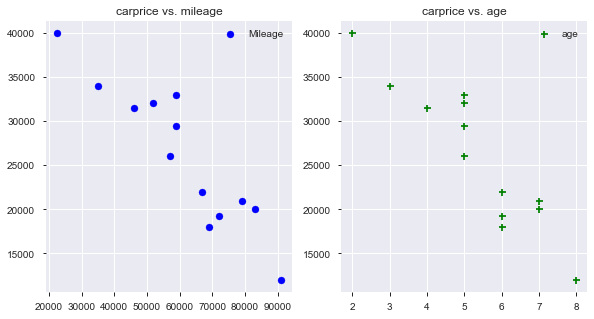

In [200]:
plt.figure(figsize=(15, 5)) 
plt.subplot(1,3,1)
plt.scatter(df['Mileage'], df['Sell Price($)'], label='Mileage', color='blue', marker='o')
plt.title('carprice vs. mileage')
plt.legend(loc=1)
plt.subplot(1,3,2)
plt.scatter(df['Age(yrs)'], df['Sell Price($)'], label='age', color='green', marker='+')
plt.title('carprice vs. age')
plt.legend(loc=1)
plt.show()

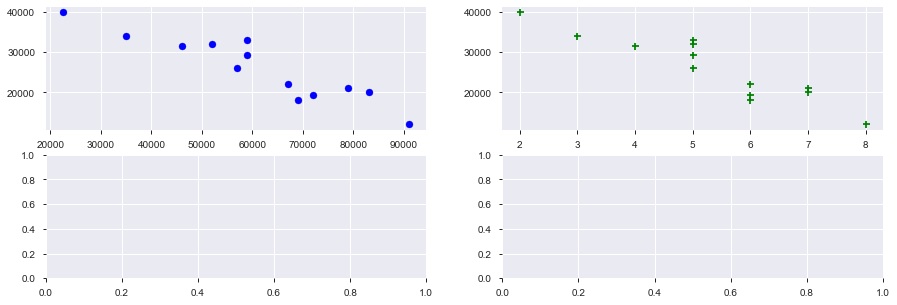

In [201]:
fig, axs =  plt.subplots(2,2, figsize = (15,5))
axs[0,0].scatter(df['Mileage'], df['Sell Price($)'], label='Mileage', color='blue', marker='o')
axs[0,1].scatter(df['Age(yrs)'], df['Sell Price($)'], label='age', color='green', marker='+')


In [229]:
import pandas_profiling

In [174]:
profile = df.profile_report(title="carprice")
profile.to_file(output_file="carprice.html")

In [ ]:
# To see the report in the notebook 
profile.to_notebook_iframe()

In [228]:
dir (pandas_profiling)

['Path',
 'ProfileReport',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__init__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'clean_column_names',
 'config',
 'controller',
 'datetime',
 'describe_df',
 'get_config_default',
 'get_config_minimal',
 'get_project_root',
 'get_report_structure',
 'json',
 'model',
 'np',
 'pandas_decorator',
 'pd',
 'rename_index',
 'report',
 'sys',
 'utils',
 'version',
 'visualisation',
 'warnings']

array([[<AxesSubplot:xlabel='Mileage', ylabel='Mileage'>,
        <AxesSubplot:xlabel='Sell Price($)', ylabel='Mileage'>,
        <AxesSubplot:xlabel='Age(yrs)', ylabel='Mileage'>],
       [<AxesSubplot:xlabel='Mileage', ylabel='Sell Price($)'>,
        <AxesSubplot:xlabel='Sell Price($)', ylabel='Sell Price($)'>,
        <AxesSubplot:xlabel='Age(yrs)', ylabel='Sell Price($)'>],
       [<AxesSubplot:xlabel='Mileage', ylabel='Age(yrs)'>,
        <AxesSubplot:xlabel='Sell Price($)', ylabel='Age(yrs)'>,
        <AxesSubplot:xlabel='Age(yrs)', ylabel='Age(yrs)'>]], dtype=object)

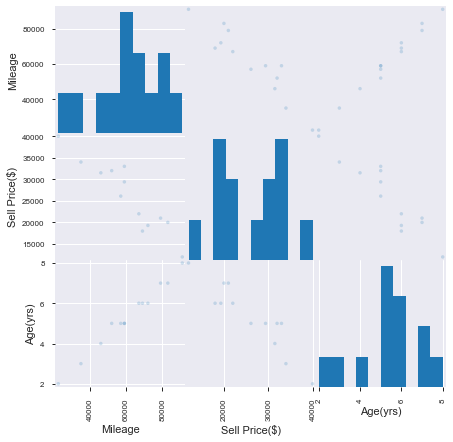

In [202]:
pd.plotting.scatter_matrix(df, figsize=(7,7),alpha=0.2)

In [203]:
! pip install sweetviz

In [224]:
import sweetviz as sv 

In [225]:
# Generate and Analyse 
report = sv.analyze(df)

                                             |                                             | [  0%]   00:00 ->â€¦

In [226]:
# View and Save 
report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [227]:
dir(sv)

['DataframeReport',
 'FeatureConfig',
 '__author__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__license__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__title__',
 '__version__',
 'analyze',
 'comet_ml_logger',
 'compare',
 'compare_intra',
 'config',
 'config_parser',
 'dataframe_report',
 'feature_config',
 'from_dython',
 'from_profiling_pandas',
 'graph',
 'graph_associations',
 'graph_cat',
 'graph_legend',
 'graph_numeric',
 'series_analyzer',
 'series_analyzer_cat',
 'series_analyzer_numeric',
 'series_analyzer_text',
 'sv_html',
 'sv_html_formatters',
 'sv_math',
 'sv_public',
 'sv_types',
 'type_detection',
 'utils']

In [204]:
! pip install dtale

  Created wheel for dash-colorscales: filename=dash_colorscales-0.0.4-py3-none-any.whl size=62598 sha256=b4d36e5acd9e2e9c65db9725337ec642ec767bbaaf508e8db9809ede6ceb98ff
  Stored in directory: c:\users\hnour\appdata\local\pip\cache\wheels\2f\22\7e\183ba2af565e3eb955021fbb4fe8fe4a6b1ed8ae3e5c03236a
  Created wheel for ppscore: filename=ppscore-1.2.0-py2.py3-none-any.whl size=13050 sha256=1e5aeaa8d259c5a4ccde8f330144349688e918aac91c63f856696094d55b33f0
  Stored in directory: c:\users\hnour\appdata\local\pip\cache\wheels\d2\3c\58\2ff786414b21713edc6f4fdb54fdee89ac37bca5edd1f60634
Successfully built dash-colorscales ppscore


In [230]:
import dtale 

In [231]:
d = dtale.show(df)

In [232]:
d

In [233]:
dir (dtale)

['ALLOW_CELL_EDITS',
 'Blueprint',
 'GITHUB_FORK',
 'HIDE_SHUTDOWN',
 'LOADERS',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'app',
 'charts',
 'cli',
 'code_export',
 'column_analysis',
 'column_builders',
 'column_filters',
 'column_replacements',
 'combine_data',
 'config',
 'dash_application',
 'data_reshapers',
 'datasets',
 'describe',
 'dtale',
 'duplicate_checks',
 'env_util',
 'get_instance',
 'global_state',
 'instances',
 'loader',
 'loader_name',
 'offline_chart',
 'query',
 'show',
 'show_arctic',
 'show_csv',
 'show_excel',
 'show_json',
 'show_parquet',
 'show_r',
 'show_sqlite',
 'translations',
 'utils',
 'views']

In [205]:
import klib

In [206]:
# Missing value plots using klib 
klib.missingval_plot(df)

No missing values found in the dataset.


In [207]:
# Data Cleaning using klib: This will drop empty and single valued columns as well as empty and duplicate rows 
df_cleaned =  klib.data_cleaning(df)

Shape of cleaned data: (13, 4)Remaining NAs: 0

Changes:
Dropped rows: 0
     of which 0 duplicates. (Rows: [])
Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.0 MB (-nan%)



C:\Users\hnour\Anaconda3\lib\site-packages\klib\clean.py:77: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  .str.replace("(", "_")
C:\Users\hnour\Anaconda3\lib\site-packages\klib\clean.py:78: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  .str.replace(")", "_")
C:\Users\hnour\Anaconda3\lib\site-packages\klib\clean.py:81: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  .str.replace(".", "_")
C:\Users\hnour\Anaconda3\lib\site-packages\klib\clean.py:84: FutureWarning: The default value of regex will change from True to False in a 

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

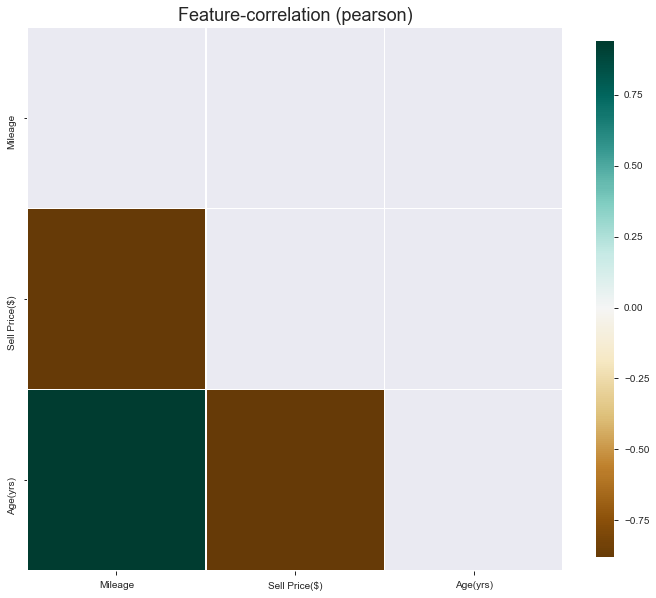

In [208]:
# Correlation plot: This will show the intercorrelation among the features 
# Display all correlations data 
klib.corr_plot (df, annot=False)

Displaying positive correlations. Specify a positive "threshold" to limit the results further.


"\nklib.corr_plot(df, split='neg', annot=False)\n"

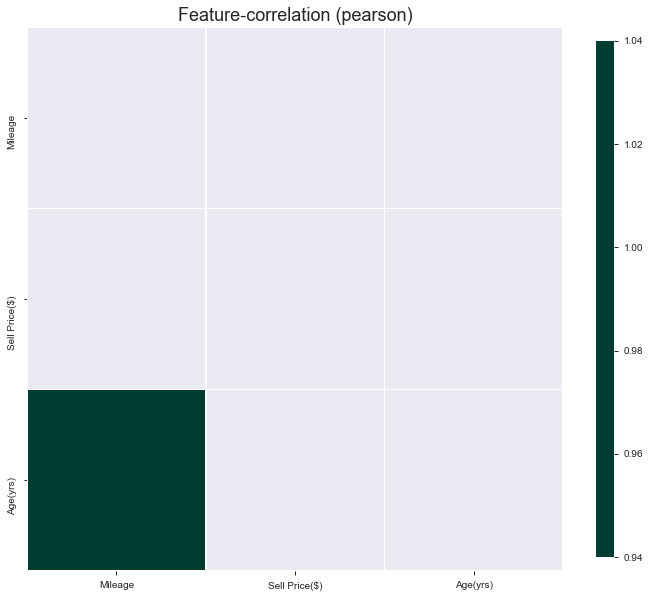

In [211]:
# Display only postive correlations data 
klib.corr_plot(df, split='pos', annot=False)

Displaying negative correlations. Specify a negative "threshold" to limit the results further.


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

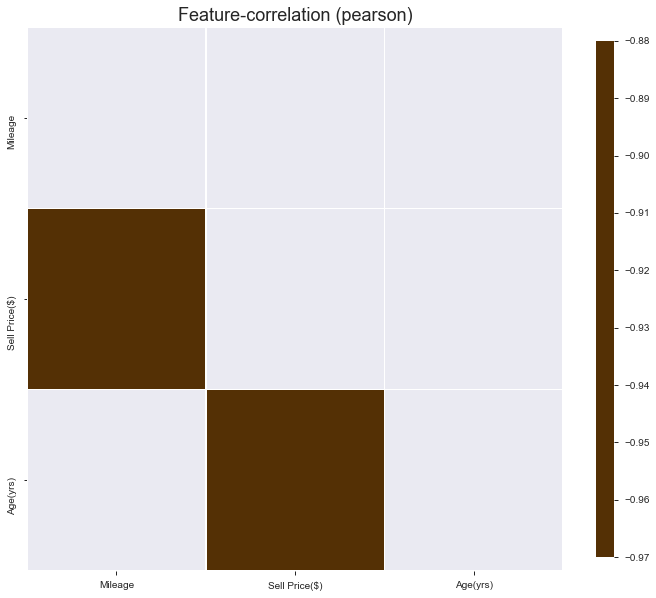

In [212]:
# Display only negative correlations data
klib.corr_plot(df, split='neg', annot=False)


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

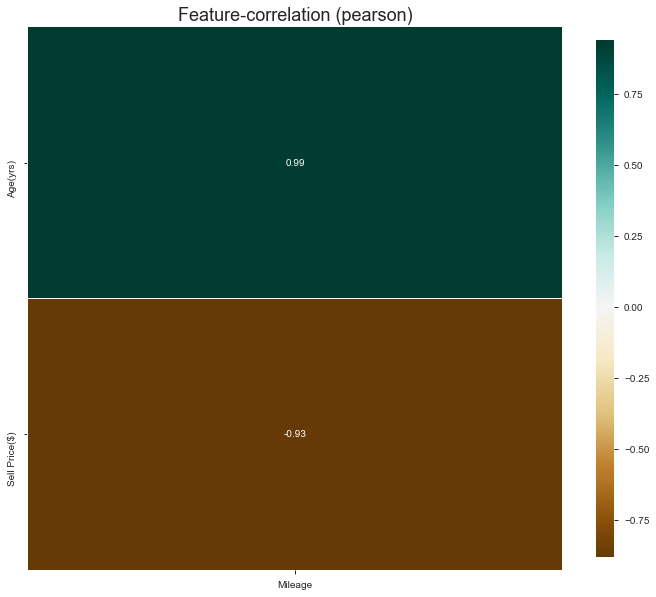

In [214]:
# Display correlation with a specific target variable of interest 
klib.corr_plot(df, target = 'Mileage')

In [215]:
# Correlation data matrix 
klib.corr_mat (df)

<AxesSubplot:xlabel='Mileage', ylabel='Density'>

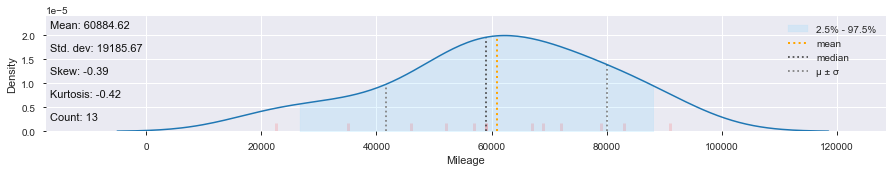

In [216]:
# Distribution plot 
klib.dist_plot(df['Mileage'])

GridSpec(6, 1)

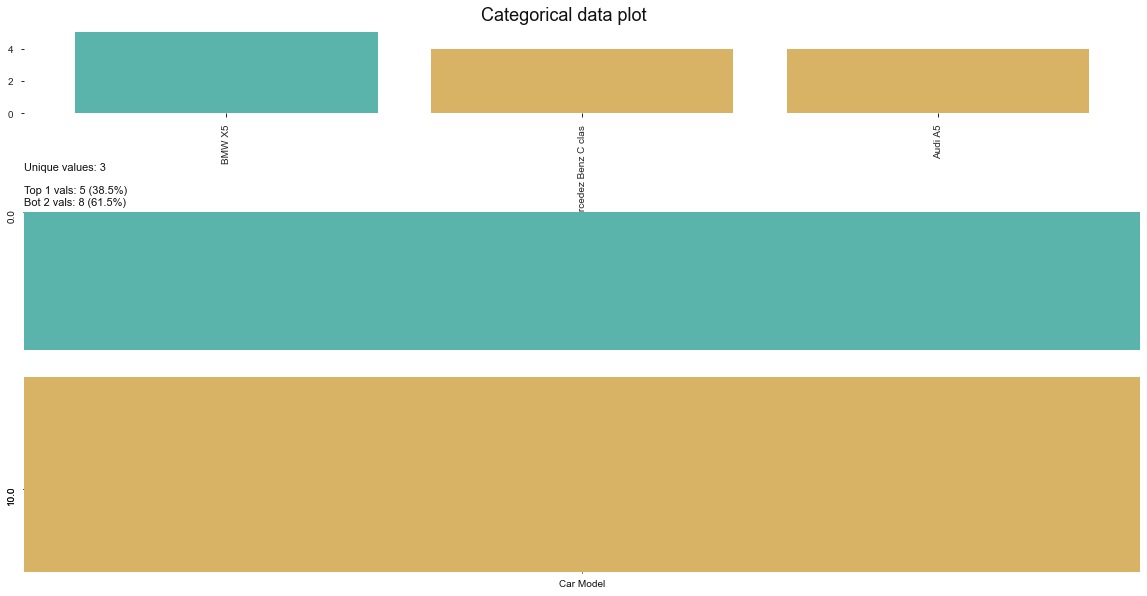

In [223]:
# Categorical plot 
klib.cat_plot (df, figsize=(20,10))

In [ ]:
# save plot 

plot = klib.corr_plot (df, annot=False, figsize=(12,10))

plot.figure.savefig('figure.pdf')

In [235]:
le = LabelEncoder()

In [247]:
dfle = df
dfle['Car Model'] = le.fit_transform(dfle['Car Model'])
dfle

Car Model  Mileage  Sell Price($)  Age(yrs)
0           1    69000          18000         6
1           1    35000          34000         3
2           1    57000          26100         5
3           1    22500          40000         2
4           1    46000          31500         4
5           0    59000          29400         5
6           0    52000          32000         5
7           0    72000          19300         6
8           0    91000          12000         8
9           2    67000          22000         6
10          2    83000          20000         7
11          2    79000          21000         7
12          2    59000          33000         5

In [267]:
y = dfle['Sell Price($)'].values
y

array([18000, 34000, 26100, 40000, 31500, 29400, 32000, 19300, 12000,
       22000, 20000, 21000, 33000], dtype=int64)

In [269]:
dfle.columns

Index(['Car Model', 'Mileage', 'Sell Price($)', 'Age(yrs)'], dtype='object')

In [271]:
X = dfle[['Car Model','Mileage','Age(yrs)']].values

In [272]:
ct = ColumnTransformer([('Car Model', OneHotEncoder(), [0])], remainder = 'passthrough')

In [273]:
X = ct.fit_transform(X)
X

array([[0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [274]:
X =np.delete(X, 0, 1)
X

array([[1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [275]:
model = LinearRegression()
model.fit (X,y)

LinearRegression()

In [276]:
model.predict(X)

array([18705.2723644 , 35286.78445645, 24479.19112468, 41245.76426391,
       29882.98779056, 28023.6135243 , 30614.46818502, 21879.57266964,
       12182.34562104, 26183.72387885, 18929.31674102, 20409.80511857,
       30477.15426157])

In [277]:
model.coef_

array([-4.28466659e+03,  2.45354074e+03, -3.70122094e-01, -1.33245363e+03])

In [278]:
model.intercept_

56523.08523128357

In [279]:
model.score(X,y)

0.9417050937281083

In [260]:
from collections import Counter

In [261]:
df_carprice= pd.read_csv ('D:/GitHub/py/ML/5_one_hot_encoding/Exercise/carprices.csv')

In [262]:
print (Counter (df_carprice['Car Model']))

Counter({'BMW X5': 5, 'Audi A5': 4, 'Mercedez Benz C class': 4})


In [285]:
# Price of mercedez benz that is 4 yr old with mileage 45000
model.predict([[0,0, 45000, 4]])

array([34537.77647335])

In [287]:
model.predict([[1,0, 45000, 4]])

array([30253.10988495])

In [288]:
model.predict([[0,1, 45000, 4]])

array([36991.31721062])

In [286]:
# Price of BMW X5 that is 7 yr old with mileage 86000
model.predict([[0,1, 86000,7]])

array([17818.95045785])

In [289]:
model.predict([[0,0, 86000,7]])

array([15365.40972059])

In [290]:
model.predict([[1,0, 86000,7]])

array([11080.74313219])